## Importing the Libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [203]:
supermarket_sales_df =pd.read_csv(r"/content/drive/MyDrive/supermarket_sales - Sheet1.csv")

## Initial Data Exploration

In [204]:
supermarket_sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [205]:
supermarket_sales_df.shape

(1000, 17)

In [206]:
#Seeing the columns
supermarket_sales_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Changing the datatype

In [207]:
# Converting 'Date' column to datetime format and 'Time' to time format
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])


# Extracting the day of the week from 'Date'
supermarket_sales_df['DayOfWeek'] = supermarket_sales_df['Date'].dt.day_name()
supermarket_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## Dealing with Duplicate Rows and Missing Values

In [208]:
#Number of rows duplicated
supermarket_sales_df.duplicated().sum()

0

In [209]:
#Number of missing values in each column
supermarket_sales_df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [210]:
supermarket_sales_df.describe()


,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


## Customer Behaviour Insights

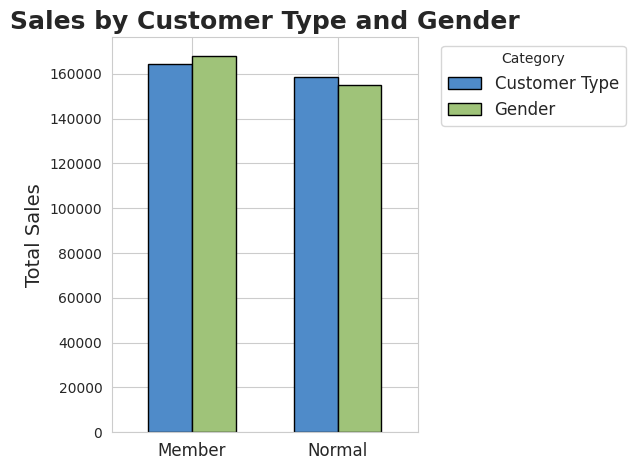

In [211]:
customer_type_sales = supermarket_sales_df.groupby('Customer type')['Total'].sum()
gender_sales = supermarket_sales_df.groupby('Gender')['Total'].sum()

# Create a DataFrame for plotting
sales_data = pd.DataFrame({
    'Customer Type': customer_type_sales.values,
    'Gender': gender_sales.values[:2]  # Assuming two genders
}, index=['Member', 'Normal'])

# Setting up the plot style
sns.set_style("whitegrid")


# Plotting the grouped bar chart
sales_data.plot(kind='bar', width=0.6, color=['#4f8bc9', '#9fc379'], edgecolor='black', linewidth=1)

# Adding titles and labels
plt.title('Sales by Customer Type and Gender', fontsize=18, fontweight='bold')
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(['Customer Type', 'Gender'], title='Category', fontsize=12, bbox_to_anchor=(1.05, 1))


# Show plot
plt.tight_layout()
plt.show()


Based on the stacked bar chart, we can observe that the total sales vary more significantly between different customer types (Member and Normal) than between genders. This suggests that customer type, rather than gender, is a stronger predictor of sales volume in this dataset.

### Average Spending per Customer Type

<Figure size 800x600 with 0 Axes>

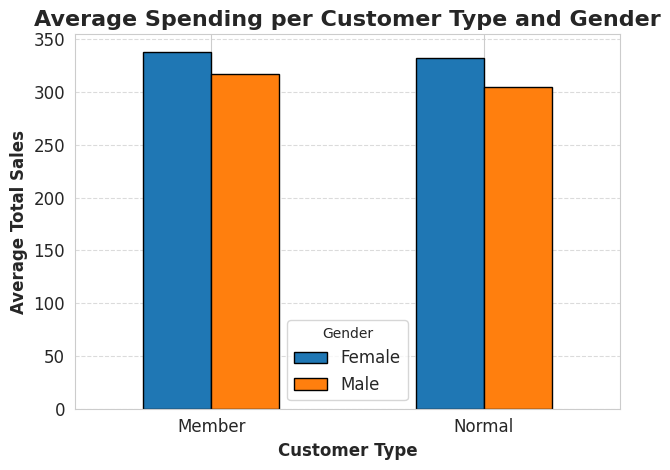

In [212]:
# Average spending per customer type and gender
average_spending_customer_type_gender = supermarket_sales_df.groupby(['Customer type', 'Gender'])['Total'].mean().unstack()

# Plotting
plt.figure(figsize=(8, 6))
average_spending_customer_type_gender.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Average Spending per Customer Type and Gender', fontsize=16, fontweight='bold')
plt.ylabel('Average Total Sales', fontsize=12, fontweight='bold')
plt.xlabel('Customer Type', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Members generally spend more than non-members, with females showing a slightly higher average spending than males across both customer types.

### Gender-based Sales Analysis

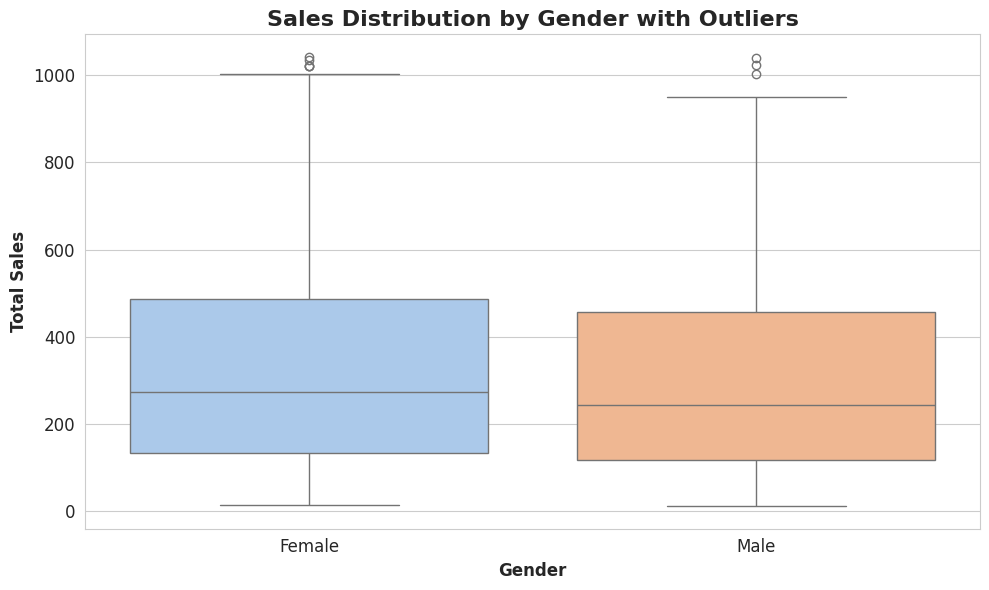

In [213]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(data=supermarket_sales_df, x='Gender', y='Total', palette='pastel')
plt.title('Sales Distribution by Gender with Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The boxplot highlights that female customers tend to have slightly higher median spending, but both genders have similar overall sales distributions. Outliers are present in both male and female customers, but more in  male sales, indicating some high-spending male customers.

## Detailed Sales Trend Analysis

### Sales Trends Over Time

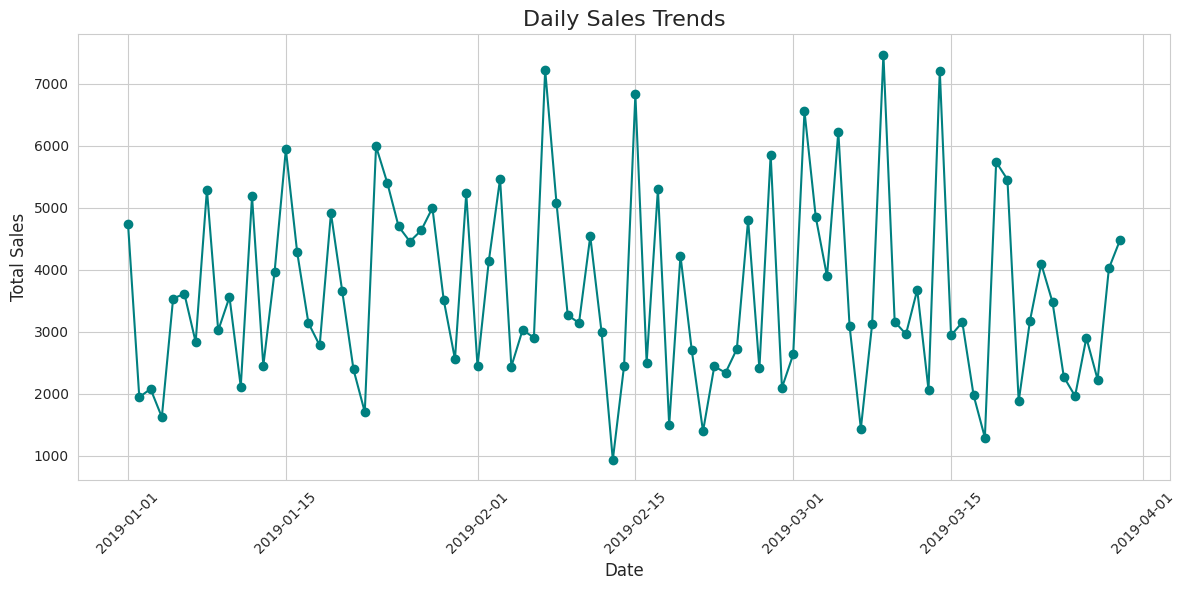

In [214]:
# Grouping sales by date
daily_sales = supermarket_sales_df.groupby('Date')['Total'].sum()

# Plotting daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='teal')
plt.title('Daily Sales Trends', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales Distribution Over Months

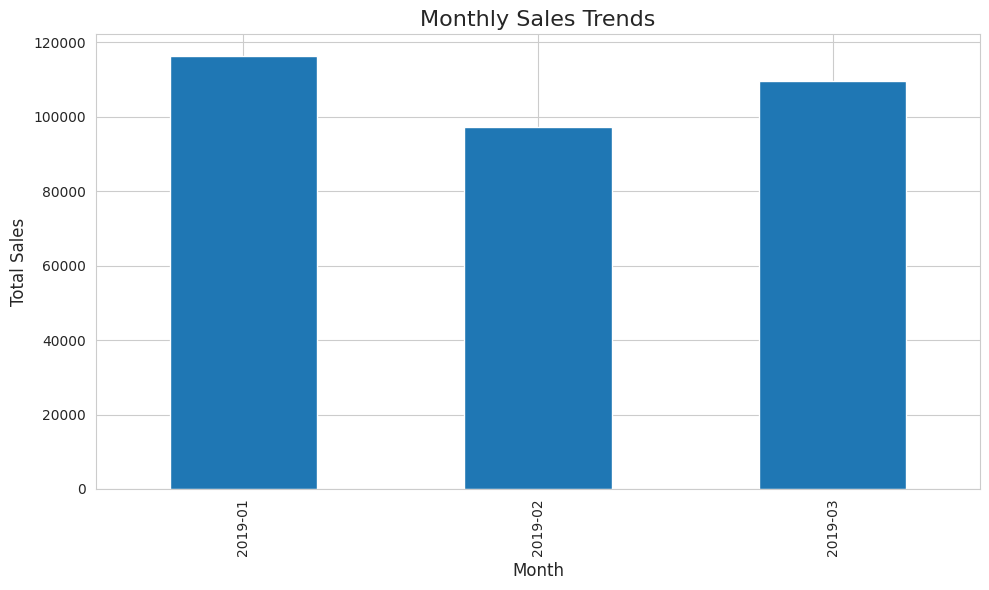

In [215]:
# Grouping sales by month to analyze monthly trends
supermarket_sales_df['Month'] = supermarket_sales_df['Date'].dt.to_period('M')
monthly_sales = supermarket_sales_df.groupby('Month')['Total'].sum()

# Plotting monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trends', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

### Analyzing Sales Trends by Day of the Week

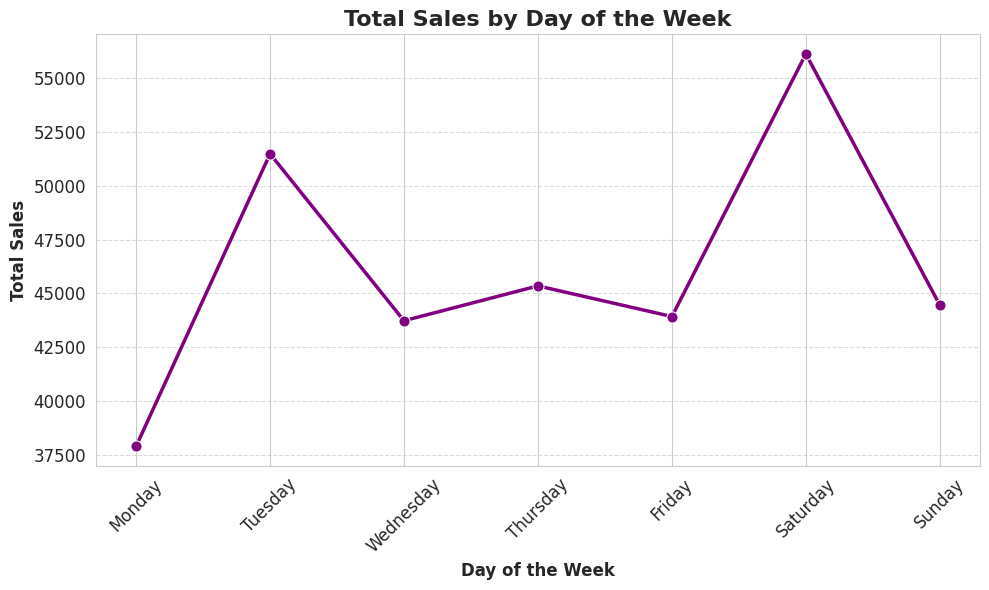

In [216]:
# Grouping sales by day of the week to observe peaks
daywise_sales = supermarket_sales_df.groupby('DayOfWeek')['Total'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting sales by day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(data=daywise_sales, marker='o', color='purple', linewidth=2.5, markersize=8)
plt.title('Total Sales by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Product Line Performance and Sales Distribution

### Sales Distribution by product line and branch

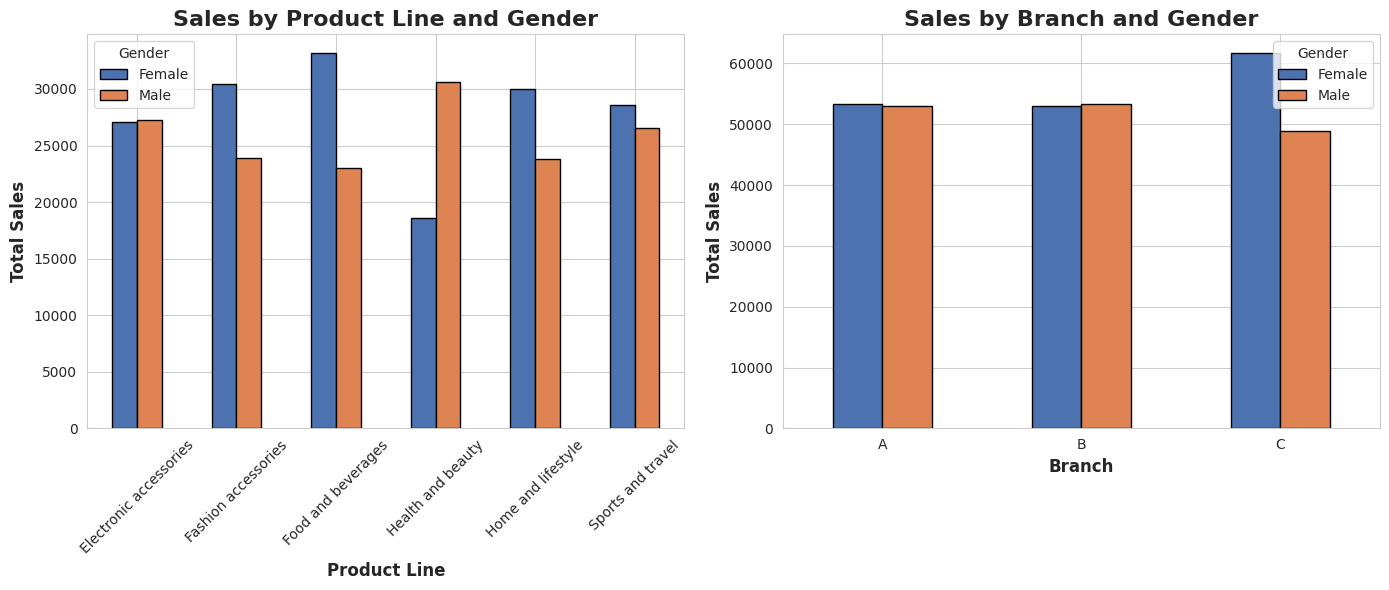

In [217]:
# Sales by product line and gender
product_line_sales_gender = supermarket_sales_df.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

# Sales by branch and gender
branch_sales_gender = supermarket_sales_df.groupby(['Branch', 'Gender'])['Total'].sum().unstack()

# Plotting side-by-side bars for sales by product line and branch with gender segregation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sales by Product Line and Gender (side-by-side)
product_line_sales_gender.plot(kind='bar', color=['#4c72b0', '#dd8452'], ax=axes[0], edgecolor='black')
axes[0].set_title('Sales by Product Line and Gender', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Total Sales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Product Line', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Gender')

# Sales by Branch and Gender (side-by-side)
branch_sales_gender.plot(kind='bar', color=['#4c72b0', '#dd8452'], ax=axes[1], edgecolor='black')
axes[1].set_title('Sales by Branch and Gender', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Total Sales', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Branch', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()


***Product Line***: Both genders contribute significantly across product lines, with males showing higher spending in Electronic Accessories and Health and beauty, while females spend more in Food and beverages,fashion accessories and  and Home and Lifestyle.
***Branch***: Sales are fairly balanced between genders across branches, with some minor variations; for instance, certain branches may see slightly higher spending from females in specific categories.

### Profit Analysis

In [218]:
# Calculate Profit
supermarket_sales_df['Profit'] = supermarket_sales_df['Total'] - supermarket_sales_df['cogs']



#### Profit by Weekday

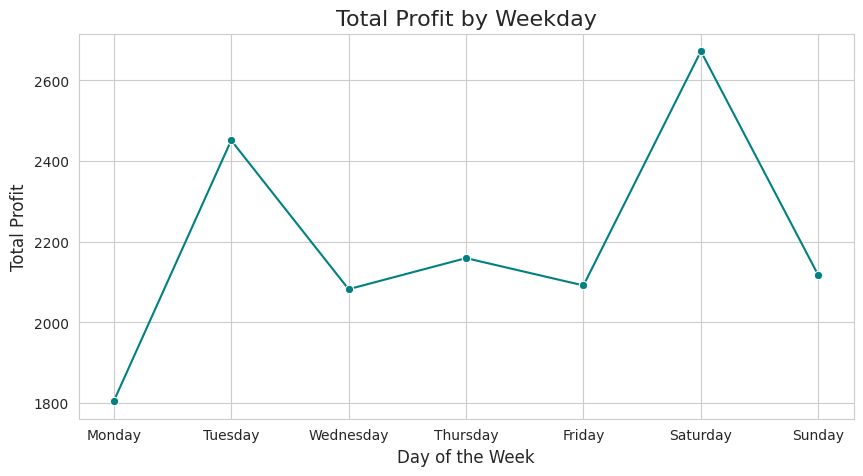

In [219]:
# Aggregate profit by weekday
profit_by_weekday = supermarket_sales_df.groupby('DayOfWeek')['Profit'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting Profit by Weekday
plt.figure(figsize=(10, 5))
sns.lineplot(x=profit_by_weekday.index, y=profit_by_weekday.values, marker='o', color='teal')
plt.title('Total Profit by Weekday', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True)
plt.show()

Conclusion: Profit tends to peak on Saturday , likely due to higher foot traffic.

#### Profit by Payment Type

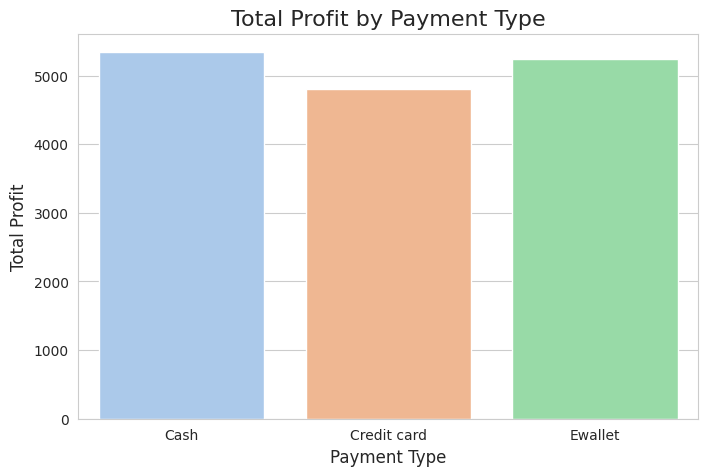

In [220]:
# Aggregate profit by payment type
profit_by_payment = supermarket_sales_df.groupby('Payment')['Profit'].sum()

# Plotting Profit by Payment Type
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_payment.index, y=profit_by_payment.values, palette='pastel')
plt.title('Total Profit by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.show()

Conclusion:Cash payments contribute the highest profit, suggesting cash payment preferences among high-spending customers.

#### Profit by Product Line

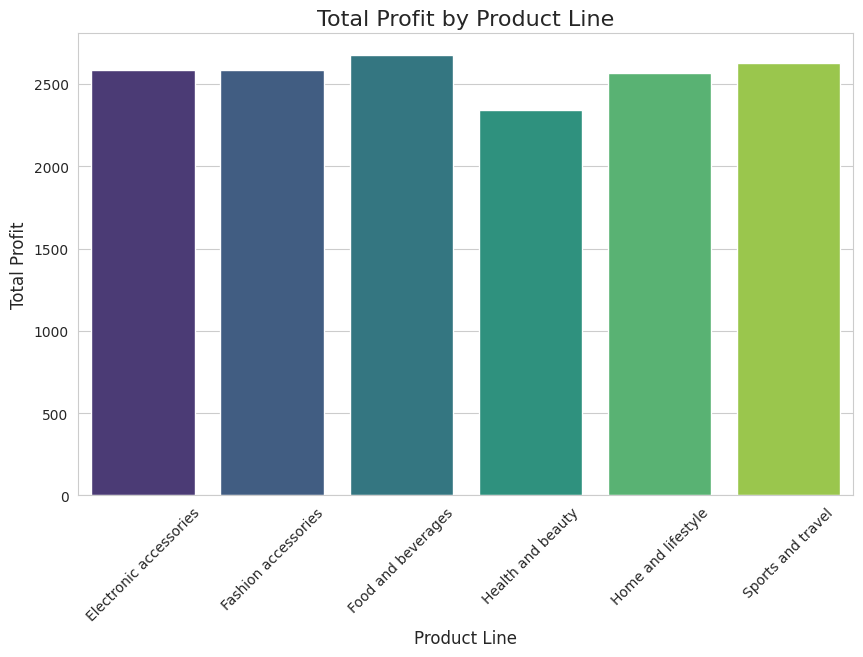

In [221]:
# Aggregate profit by product line
profit_by_product_line = supermarket_sales_df.groupby('Product line')['Profit'].sum()

# Plotting Profit by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_product_line.index, y=profit_by_product_line.values, palette='viridis')
plt.title('Total Profit by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Conclusion: Food and beverages products generate the highest profit, making it the most lucrative category.

#### Profit by Gender

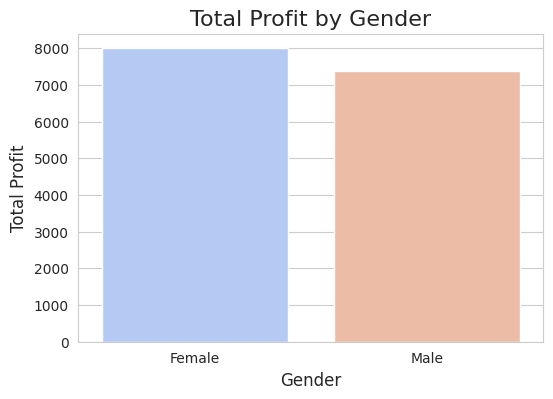

In [222]:
# Aggregate profit by gender
profit_by_gender = supermarket_sales_df.groupby('Gender')['Profit'].sum()

# Plotting Profit by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x=profit_by_gender.index, y=profit_by_gender.values, palette='coolwarm')
plt.title('Total Profit by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.show()



Conclusion: Female customers contribute slightly more to the total profit, indicating potential gender-based spending differences.

## Payment Method Analysis

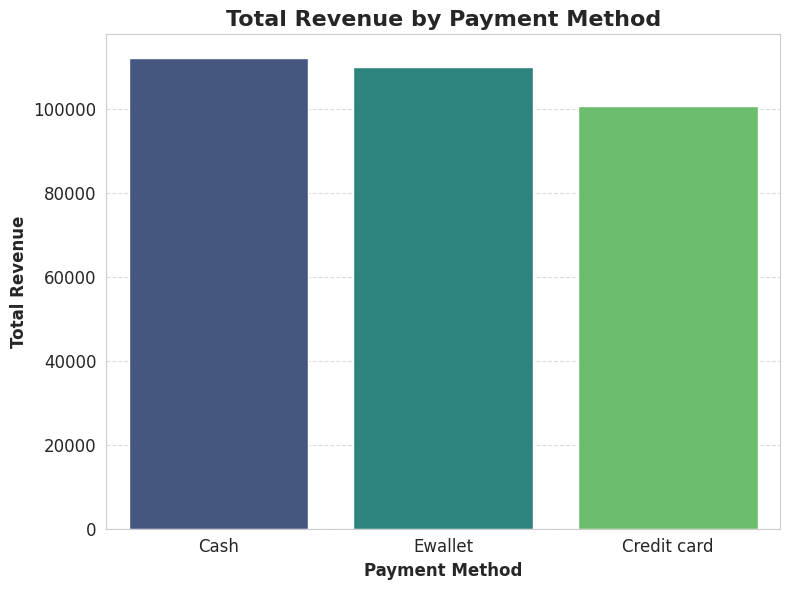

In [223]:
# Total revenue by payment method
payment_revenue = supermarket_sales_df.groupby('Payment')['Total'].sum().sort_values(ascending=False)

# Plotting payment method vs total revenue
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette='viridis')
plt.title('Total Revenue by Payment Method', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar plot indicates that cash transactions generate the most revenue, followed by e-wallets and  credit cards

## Gross Income and Rating Relationship

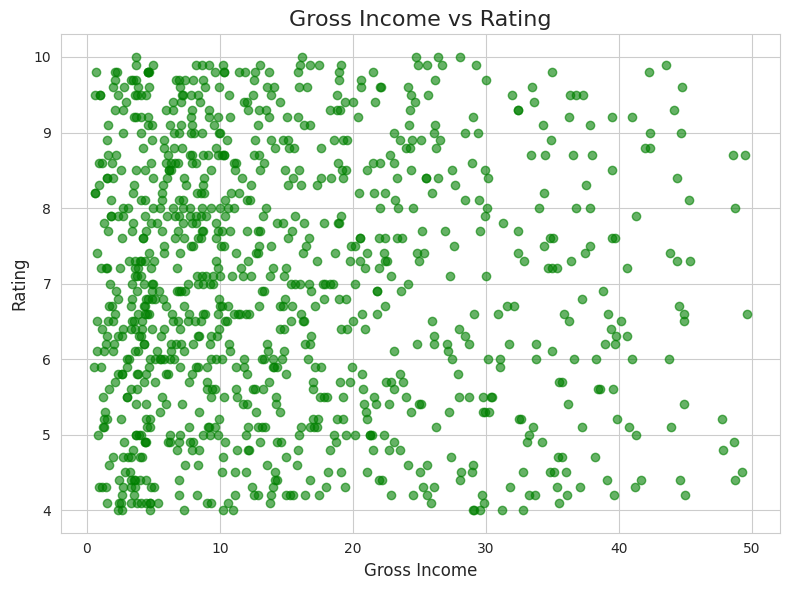

In [224]:
# Scatter plot to examine relationship between gross income and rating
plt.figure(figsize=(8, 6))
plt.scatter(supermarket_sales_df['gross income'], supermarket_sales_df['Rating'], color='green', alpha=0.6)
plt.title('Gross Income vs Rating', fontsize=16)
plt.xlabel('Gross Income', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


There doesn’t seem to be a strong linear correlation between Gross income and Rating. While higher gross income does not guarantee better ratings, there is some clustering around the mid-range ratings (around 7), indicating that most customers rate their experiences around that level regardless of spending.

## Correlation Heatmap

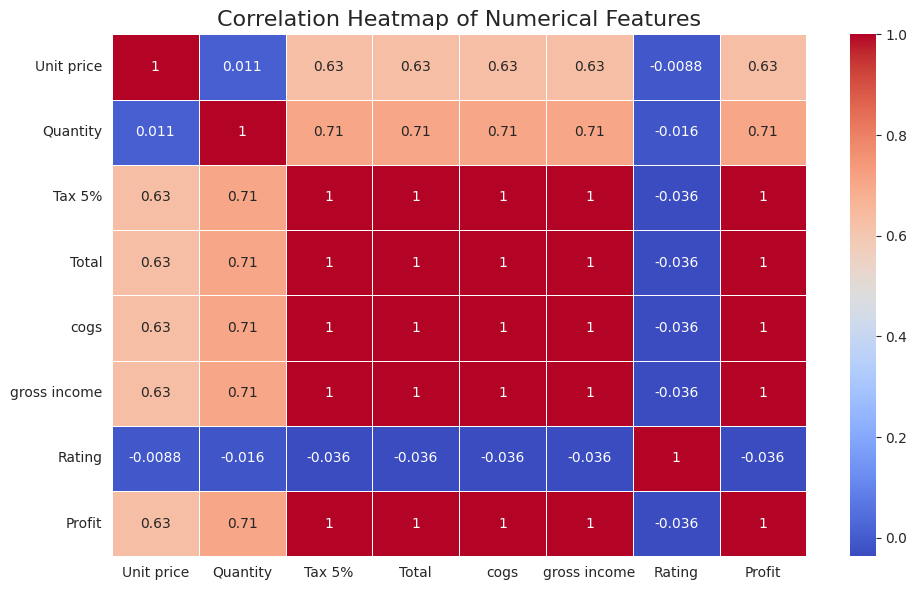

In [225]:
# Correlation heatmap
numerical_columns = supermarket_sales_df.select_dtypes(include=np.number).drop('gross margin percentage', axis=1).columns
correlation_matrix = supermarket_sales_df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

The heatmap confirms that Quantity and Total sales are highly correlated, as expected. Additionally, Gross income correlates well with Total sales. The weak correlation between Rating and other features indicates that customer satisfaction is more influenced by factors beyond just sales figures.

## Prediction of next month sales

In [226]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [227]:
# Load and preprocess the data
df = supermarket_sales_df.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['TotalSales'] = df.groupby('Date')['Total'].transform('sum')

In [228]:
# Feature selection for Random Forest (choosing relevant columns)
features = df[['Day', 'DayOfWeek', 'Unit price', 'Quantity']]
target = df['TotalSales']

In [229]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=35)

In [230]:
# Model instantiation and training
model = RandomForestRegressor(n_estimators=445, random_state=35)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=445, random_state=35)

In [231]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 744.5951006797752
Mean Squared Error: 1236624.9242427824
R2 Score: 0.5024789239875058


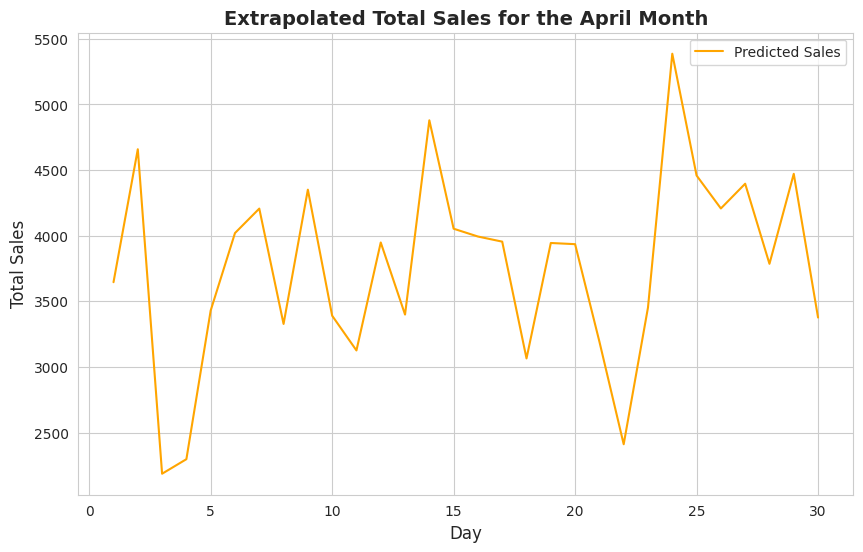

In [232]:
# Extrapolation for the next month (30 days ahead)
future_days = pd.DataFrame({
    'Day': np.arange(1, 31),
    'DayOfWeek': [(df['DayOfWeek'].max() + i) % 7 for i in range(1, 31)],
    'Unit price': df['Unit price'].mean(),  # Using average values for simplicity
    'Quantity': df['Quantity'].mean()
})

# Predicting future sales
future_sales = model.predict(future_days)

# Plotting future sales predictions
plt.figure(figsize=(10, 6))
plt.plot(future_days['Day'], future_sales, label='Predicted Sales', color='orange')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Extrapolated Total Sales for the April Month', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
print(f"R2 Score for Model Accuracy: {r2}")

R2 Score for Model Accuracy: 0.5024789239875058


The Random Forest model predicts daily sales with a decent accuracy, as seen by the R2 score.
The extrapolated sales trend suggests expected sales volumes over the next month, which can aid in inventory and staff planning.

In [235]:
pip install pmdarima

ADF Statistic: -7.654895726803344
p-value: 1.7495640309589603e-11
The data is stationary; no differencing needed.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1727.948, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1621.491, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1678.920, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1607.388, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1596.740, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1589.414, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1566.363, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1564.354, Time=0.07 sec
 ARIMA(2,0

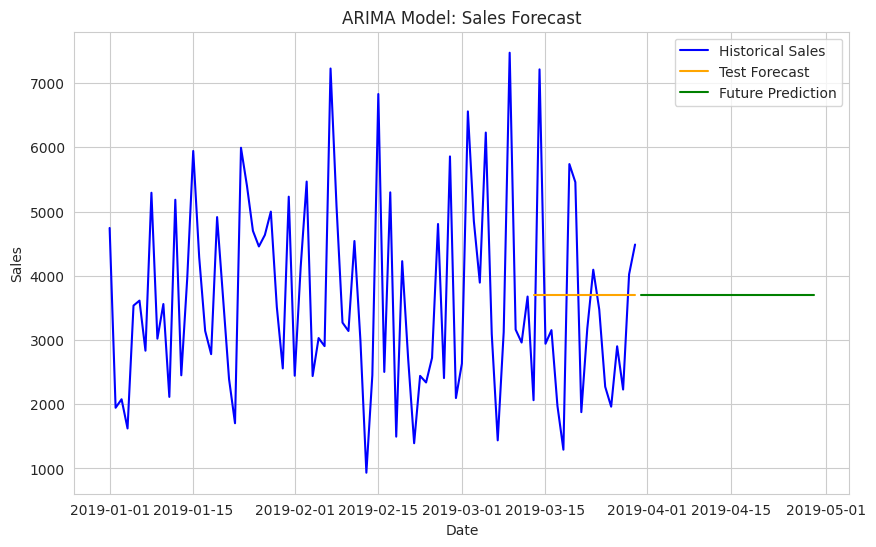

Model Accuracy: 53.22%


In [236]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Load and Prepare the Data
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])
supermarket_sales_df.set_index('Date', inplace=True)

# Aggregating daily sales
daily_sales = supermarket_sales_df['Total'].resample('D').sum()

# Step 2: Check Stationarity
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(daily_sales)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] <= 0.05:
    print("The data is stationary; no differencing needed.")
else:
    print("The data is non-stationary; differencing required.")

# Step 3: Use auto_arima to Determine Optimal Parameters
import warnings
warnings.filterwarnings("ignore")

model_auto_arima = auto_arima(
    daily_sales,
    seasonal=False,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)
print(model_auto_arima.summary())

# Extracting the optimal p, d, q values
order = model_auto_arima.order
print(f"Optimal ARIMA order: {order}")

# Step 4: Train the ARIMA Model
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

model = ARIMA(train_data, order=order)
fitted_model = model.fit()

# Step 5: Forecasting on Test Data
forecast = fitted_model.forecast(steps=len(test_data))
rmse = sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE: {rmse}")
mean=np.mean(test_data)
print(f"Mean: {mean}")

# Step 6: Predict the Next 30 Days
future_forecast = fitted_model.forecast(steps=30)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(daily_sales, label='Historical Sales', color='blue')
plt.plot(test_data.index, forecast, label='Test Forecast', color='orange')
plt.plot(pd.date_range(daily_sales.index[-1], periods=31, freq='D')[1:], future_forecast, label='Future Prediction', color='green')
plt.title('ARIMA Model: Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 7: Accuracy Calculation
accuracy = (1 - rmse / np.mean(test_data)) * 100
print(f"Model Accuracy: {accuracy:.2f}%")